In [5]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
data = fetch_20newsgroups()

In [7]:
categories = data.target_names

In [10]:
train = fetch_20newsgroups(subset="train", categories=categories)
test = fetch_20newsgroups(subset="test",categories=categories)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [21]:
model = make_pipeline(TfidfVectorizer(),MultinomialNB())

In [23]:
model.fit(train.data,train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [26]:
prediction = model.predict(test.data)

In [27]:
from sklearn.metrics import confusion_matrix

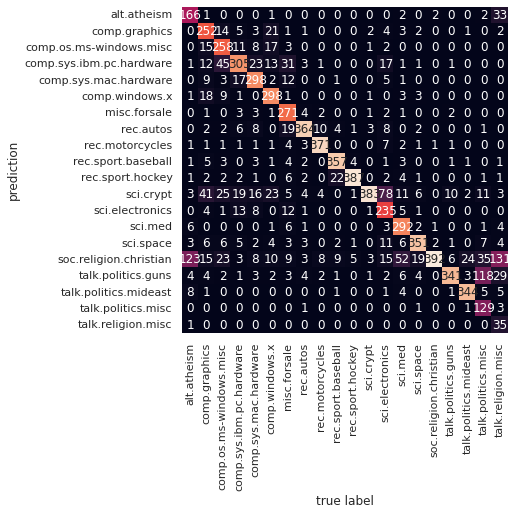

In [35]:
mat = confusion_matrix(test.target,prediction)
plt.figure(figsize=(10,6))
sns.heatmap(mat.T,square=True,annot=True,fmt="d",cbar=False,
            xticklabels=train.target_names,
            yticklabels=train.target_names)
plt.xlabel("true label")
plt.ylabel("prediction")
plt.show()

In [37]:
def predict_categort(s, model=model,train=train):
  pred = model.predict([s])
  return train.target_names[pred[0]]

In [39]:
predict_categort("prophet mohammed")

'soc.religion.christian'

In [41]:
predict_categort("bmw is better than audi")

'rec.autos'